(tax_smoothing_1)=
```{raw} html
<div id="qe-notebook-header" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>
```

```{index} single: python
```

# How to Pay for a War: Part 1

```{contents} Contents
:depth: 2
```

In addition to what's in Anaconda, this lecture will deploy quantecon:

In [1]:
!pip install --upgrade quantecon

Requirement already up-to-date: quantecon in /usr/share/miniconda3/envs/qe-lectures/lib/python3.8/site-packages (0.4.8)


## Reader's Guide

Let's start with some standard imports:

In [2]:
import quantecon as qe
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

This lecture uses the method of   **Markov jump linear quadratic dynamic programming** that is described in lecture
{doc}`Markov Jump LQ dynamic programming <markov_jump_lq>`
to extend the {cite}`Barro1979` model of optimal tax-smoothing and government debt in a
particular direction.

This lecture has two sequels that offer further extensions of the Barro model

1. {doc}`How to Pay for a War: Part 2 <tax_smoothing_2>`
1. {doc}`How to Pay for a War: Part 3 <tax_smoothing_3>`

The extensions are modified versions of
his 1979 model later suggested by Barro (1999 {cite}`barro1999determinants`, 2003 {cite}`barro2003religion`).

Barro’s original 1979 {cite}`Barro1979` model is about a government that borrows and lends
in order to minimize an intertemporal measure of distortions
caused by taxes.

Technical tractability induced Barro {cite}`Barro1979` to assume that

- the government trades only one-period risk-free debt, and
- the one-period risk-free interest rate is constant

By using  *Markov jump linear quadratic dynamic
programming* we  can allow interest rates to move over time in
empirically interesting ways.

Also, by expanding the dimension of the
state, we can add a maturity composition decision to the government’s
problem.

It is by doing these two things that we extend Barro’s 1979 {cite}`Barro1979`
model along lines he suggested in Barro (1999 {cite}`barro1999determinants`, 2003 {cite}`barro2003religion`).

Barro (1979) {cite}`Barro1979` assumed

- that a government faces an **exogenous sequence** of expenditures
  that it must finance by a tax collection sequence whose expected
  present value equals the initial debt it owes plus the expected
  present value of those expenditures.
- that the government wants to minimize the following measure of tax
  distortions: $E_0 \sum_{t=0}^{\infty} \beta^t T_t^2$, where $T_t$ are total tax collections and $E_0$
  is a mathematical expectation conditioned on time $0$
  information.
- that the government trades only one asset, a risk-free one-period
  bond.
- that the gross interest rate on the one-period bond is constant and
  equal to $\beta^{-1}$, the reciprocal of the factor
  $\beta$ at which the government discounts future tax distortions.

Barro’s model can be mapped into a discounted linear quadratic dynamic
programming problem.

Partly inspired by Barro
(1999) {cite}`barro1999determinants` and Barro (2003) {cite}`barro2003religion`,
our generalizations of Barro’s (1979) {cite}`Barro1979` model assume

- that the government borrows or saves in the form of risk-free bonds
  of maturities $1, 2, \ldots , H$.
- that interest rates on those bonds are time-varying and in particular,
  governed by a jointly stationary stochastic process.

Our generalizations are designed to fit within a generalization of an
ordinary linear quadratic dynamic programming problem in which matrices
that define the quadratic objective function and the state transition
function are **time-varying** and **stochastic**.

This generalization, known as a **Markov jump linear quadratic dynamic
program**, combines

- the computational simplicity of **linear quadratic dynamic
  programming**, and
- the ability of **finite state Markov chains** to represent
  interesting patterns of random variation.

We want the stochastic time variation in the matrices defining the
dynamic programming problem to represent variation over time in

- interest rates
- default rates
- roll over risks

As described in {doc}`Markov Jump LQ dynamic programming <markov_jump_lq>`,
the idea underlying **Markov jump linear quadratic dynamic programming**
is to replace the constant matrices defining a **linear quadratic
dynamic programming problem** with matrices that are fixed functions of
an $N$ state Markov chain.

For infinite horizon problems, this leads to $N$ interrelated
matrix Riccati equations that pin down $N$ value functions and
$N$ linear decision rules, applying to the $N$ Markov
states.

## Public Finance Questions

Barro’s 1979 {cite}`Barro1979` model is designed to answer questions such as

- Should a government finance an exogenous surge in government
  expenditures by raising taxes or borrowing?
- How does the answer to that first question depend on the exogenous
  stochastic process for government expenditures, for example, on
  whether the surge in government expenditures can be expected to be
  temporary or permanent?

Barro’s 1999 {cite}`barro1999determinants` and 2003 {cite}`barro2003religion`
models are designed to answer more fine-grained
questions such as

- What determines whether a government wants to issue short-term or
  long-term debt?
- How do roll-over risks affect that decision?
- How does the government’s long-short *portfolio management* decision
  depend on features of the exogenous stochastic process for government
  expenditures?

Thus, both the simple and the more fine-grained versions of Barro’s
models are ways of precisely formulating the classic issue of *How to
pay for a war*.

This lecture describes:

- An application of Markov jump LQ dynamic programming to a model in
  which a government faces exogenous time-varying interest rates for
  issuing one-period risk-free debt.

A {doc}`sequel to this
lecture <tax_smoothing_2>`
describes applies Markov LQ control to settings in which a government
issues risk-free debt of different maturities.

## Barro (1979) Model

We begin by solving a version of the Barro (1979) {cite}`Barro1979` model by mapping it
into the original LQ framework.

As mentioned [in this lecture](https://python-intro.quantecon.org/perm_income_cons.html), the
Barro model is mathematically isomorphic with the LQ permanent income
model.

Let $T_t$ denote tax collections, $\beta$ a discount factor,
$b_{t,t+1}$ time $t+1$ goods that the government promises to
pay at $t$, $G_t$ government purchases, $p_{t,t+1}$
the number of time $t$ goods received per time $t+1$ goods
promised.

Evidently, $p_{t, t+1}$ is inversely related to
appropriate corresponding gross interest rates on government debt.

In the spirit of Barro (1979) {cite}`Barro1979`, the stochastic process of government
expenditures is exogenous.

The government’s problem is to choose a plan
for taxation and borrowing $\{b_{t+1}, T_t\}_{t=0}^\infty$ to
minimize

$$
E_0 \sum_{t=0}^\infty \beta^t T_t^2
$$

subject to the constraints

$$
T_t + p_{t,t+1} b_{t,t+1} = G_t + b_{t-1,t}
$$

$$
G_t = U_{g} z_t
$$

$$
z_{t+1} = A_{22} z_t + C_{2} w_{t+1}
$$

where $w_{t+1} \sim {\cal N}(0,I)$

The variables
$T_t, b_{t, t+1}$ are *control* variables chosen at $t$,
while $b_{t-1,t}$ is an endogenous state variable inherited from
the past at time $t$ and $p_{t,t+1}$ is an exogenous state
variable at time $t$.

To begin, we  assume that
$p_{t,t+1}$ is constant (and equal to $\beta$)

* later  we will  extend the model to allow $p_{t,t+1}$ to vary over time

To map into the LQ framework, we use
$x_t = \begin{bmatrix} b_{t-1,t} \\ z_t \end{bmatrix}$ as the
state vector, and $u_t = b_{t,t+1}$ as the control variable.

Therefore, the $(A, B, C)$ matrices are defined by the state-transition law:

$$
x_{t+1} = \begin{bmatrix} 0 & 0 \\ 0 & A_{22} \end{bmatrix} x_t + \begin{bmatrix} 1 \\ 0 \end{bmatrix} u_t + \begin{bmatrix} 0 \\ C_2 \end{bmatrix} w_{t+1}
$$

To find the appropriate $(R, Q, W)$ matrices, we note that $G_t$ and
$b_{t-1,t}$ can be written as appropriately defined functions of
the current state:

$$
G_t = S_G x_t \hspace{2mm}, \hspace{2mm} b_{t-1,t} = S_1 x_t
$$

If we define $M_t = - p_{t,t+1}$, and let $S = S_G + S_1$, then
we can write taxation as a function of the states and control using the
government’s budget constraint:

$$
T_t = S x_t + M_t u_t
$$

It follows that the $(R, Q, W)$ matrices are implicitly defined by:

$$
T_t^2 = x_t'S'Sx_t + u_t'M_t'M_tu_t + 2 u_t'M_t'S x_t
$$

If we assume that $p_{t,t+1} = \beta$, then $M_t \equiv M = -\beta$.

In this case, none of
the LQ matrices are time varying, and we can use the original LQ
framework.

We will implement this constant interest-rate version first, assuming
that $G_t$ follows an AR(1) process:

$$
G_{t+1} = \bar G + \rho G_t + \sigma w_{t+1}
$$

To do this, we set
$z_t = \begin{bmatrix} 1 \\ G_t \end{bmatrix}$, and consequently:

$$
A_{22} = \begin{bmatrix} 1 & 0 \\ \bar G & \rho \end{bmatrix} \hspace{2mm} ,
\hspace{2mm} C_2 = \begin{bmatrix} 0 \\ \sigma \end{bmatrix}
$$

In [3]:
# Model parameters
β, Gbar, ρ, σ = 0.95, 5, 0.8, 1

# Basic model matrices
A22 = np.array([[1,    0],
                [Gbar, ρ],])

C2 = np.array([[0],
               [σ]])

Ug = np.array([[0, 1]])

# LQ framework matrices
A_t = np.zeros((1, 3))
A_b = np.hstack((np.zeros((2, 1)), A22))
A = np.vstack((A_t, A_b))

B = np.zeros((3, 1))
B[0, 0] = 1

C = np.vstack((np.zeros((1, 1)), C2))

Sg = np.hstack((np.zeros((1, 1)), Ug))
S1 = np.zeros((1, 3))
S1[0, 0] = 1
S = S1 + Sg

M = np.array([[-β]])

R = S.T @ S
Q = M.T @ M
W = M.T @ S

# Small penalty on the debt required to implement the no-Ponzi scheme
R[0, 0] = R[0, 0] + 1e-9

We can now create an instance of `LQ`:

In [4]:
LQBarro = qe.LQ(Q, R, A, B, C=C, N=W, beta=β)
P, F, d = LQBarro.stationary_values()
x0 = np.array([[100, 1, 25]])

We can see the isomorphism by noting that consumption is a martingale in
the permanent income model and that taxation is a martingale in Barro’s
model.

We can check this using the $F$ matrix of the LQ model.

Because $u_t = -F x_t$, we have

$$
T_t = S x_t + M u_t = (S - MF) x_t
$$

and

$$
T_{t+1} = (S-MF)x_{t+1} = (S-MF)(Ax_t + B u_t + C w_{t+1}) = (S-MF)((A-BF)x_t + C w_{t+1})
$$

Therefore, the mathematical expectation of $T_{t+1}$ conditional on  time
$t$ information is

$$
E_t T_{t+1} = (S-MF)(A-BF)x_t
$$

Consequently, taxation is a martingale ($E_t T_{t+1} = T_t$) if

$$
(S-MF)(A-BF) = (S-MF) ,
$$

which holds in this case:

In [5]:
S - M @ F, (S - M @ F) @ (A - B @ F)

(array([[ 0.05000002, 19.79166502,  0.2083334 ]]),
 array([[ 0.05000002, 19.79166504,  0.2083334 ]]))

This explains the  fanning out of the conditional empirical  distribution of  taxation across time, computing
by simulation the
Barro model a large number of times:

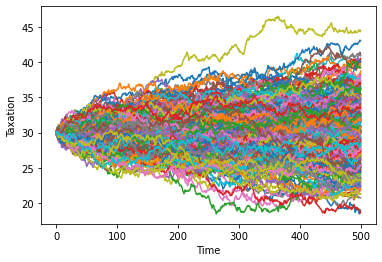

In [6]:
T = 500
for i in range(250):
    x, u, w = LQBarro.compute_sequence(x0, ts_length=T)
    plt.plot(list(range(T+1)), ((S - M @ F) @ x)[0, :])
plt.xlabel('Time')
plt.ylabel('Taxation')
plt.show()

We can see a similar, but a smoother pattern, if we plot government debt
over time.

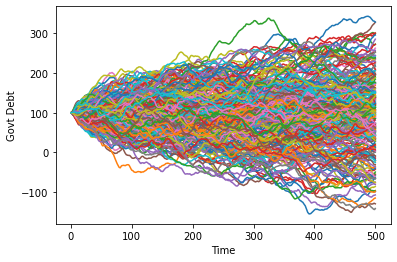

In [7]:
T = 500
for i in range(250):
    x, u, w = LQBarro.compute_sequence(x0, ts_length=T)
    plt.plot(list(range(T+1)), x[0, :])
plt.xlabel('Time')
plt.ylabel('Govt Debt')
plt.show()

## Python Class to Solve Markov Jump Linear Quadratic Control Problems

To implement the extension to the Barro model in which $p_{t,t+1}$
varies over time, we must allow the M matrix to be time-varying.

Our $Q$ and $W$ matrices must also vary over time.

We can solve such a
model using the `LQMarkov` class that solves Markov jump linear
quandratic control problems as described above.

The code for the class can be viewed
[here](https://github.com/QuantEcon/QuantEcon.py/blob/master/quantecon/lqcontrol.py#L334).

The class takes lists of matrices that corresponds to $N$ Markov states.

The value and policy functions are then found by iterating on  a coupled system of matrix Riccati difference
equations.

Optimal  $P_s,F_s,d_s$  are stored as attributes.

The class also contains a “method” for simulating the model.

## Barro Model with a Time-varying Interest Rate

We can use the above class to implement a version of the Barro model
with a time-varying interest rate. The simplest way to extend the model
is to allow the interest rate to take two possible values. We set:

$$
p^1_{t,t+1} = \beta + 0.02 = 0.97
$$

$$
p^2_{t,t+1} = \beta - 0.017 = 0.933
$$

Thus, the first Markov state  has a low interest rate, and the
second Markov state has a high interest rate.

We also need to specify a transition matrix for the Markov state.

We use:

$$
\Pi = \begin{bmatrix} 0.8 & 0.2 \\ 0.2 & 0.8 \end{bmatrix}
$$

(so each Markov state is persistent, and there is an equal chance
of moving from one state to the other)

The choice of parameters means that the unconditional expectation of
$p_{t,t+1}$ is 0.9515, higher than $\beta (=0.95)$.

If we
were to set $p_{t,t+1} = 0.9515$ in the version of the model with
a constant interest rate, government debt would explode.

In [8]:
# Create list of matrices that corresponds to each Markov state
Π = np.array([[0.8, 0.2],
              [0.2, 0.8]])

As = [A, A]
Bs = [B, B]
Cs = [C, C]
Rs = [R, R]

M1 = np.array([[-β - 0.02]])
M2 = np.array([[-β + 0.017]])

Q1 = M1.T @ M1
Q2 = M2.T @ M2
Qs = [Q1, Q2]
W1 = M1.T @ S
W2 = M2.T @ S
Ws = [W1, W2]

# create Markov Jump LQ DP problem instance
lqm = qe.LQMarkov(Π, Qs, Rs, As, Bs, Cs=Cs, Ns=Ws, beta=β)
lqm.stationary_values();

The decision rules are now dependent on the Markov state:

In [9]:
lqm.Fs[0]

array([[-0.98437712, 19.20516427, -0.8314215 ]])

In [10]:
lqm.Fs[1]

array([[-1.01434301, 21.5847983 , -0.83851116]])

Simulating a large number of such economies over time reveals
interesting dynamics.

Debt tends to stay low and stable but
recurrently surges.

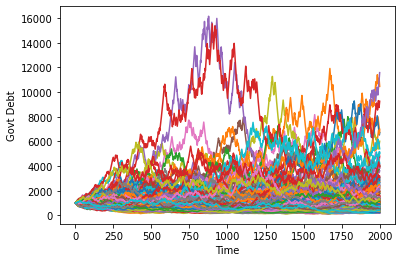

In [11]:
T = 2000
x0 = np.array([[1000, 1, 25]])
for i in range(250):
    x, u, w, s = lqm.compute_sequence(x0, ts_length=T)
    plt.plot(list(range(T+1)), x[0, :])
plt.xlabel('Time')
plt.ylabel('Govt Debt')
plt.show()